In [1]:
%matplotlib inline

#
import sys
import warnings
#import inspect
import numbers

#
import numpy as np

#
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#
from astropy.io import fits
import astropy.units as u
import astropy.constants as c

#
from astrodendro import Dendrogram

#
import FITS_tools as fits_tools

In [2]:
sys.path.insert(0, '/Users/hopechen/Documents/projects/git_projects/Dryads/Dryads')

import styles
from Dryads import Dryads

In [3]:
direcData = '/Users/hopechen/Documents/projects/GAS/data/DR1/'

# Dryads

*Dryads* is the name of tree nymphs and also the name of the Python package used to explore the dendrogram, or the *"tree diagram."*

**This jupyter notebook is used mainly for code development, and temporarily as an overview/tutorial of the *Dryads* pakcage.**

### Data

In [4]:
imN = fits.open(direcData+'HerschelColDensTemps/L1688/OphL1688_colden_masked.fits')[0].data
hdrN = fits.open(direcData+'HerschelColDensTemps/L1688/OphL1688_colden_masked.fits')[0].header
imS0 = fits.open(direcData+'PropertyMaps/L1688/L1688_Sigma_DR1_rebase3_flag.fits')[0].data
imT = fits.open(direcData+'PropertyMaps/L1688/L1688_Tkin_DR1_rebase3_flag.fits')[0].data

#
hdr = fits.open(direcData+'PropertyMaps/L1688/L1688_Sigma_DR1_rebase3_flag.fits')[0].header
imN = fits_tools.hcongrid.hcongrid(imN, hdrN, hdr)

#
imS = np.sqrt((imS0*u.km/u.s)**2. - c.k_B*(imT*u.K)/(17.031*u.u) + c.k_B*(imT*u.K)/(2.37*u.u))

### Calculation

In [5]:
dryads = Dryads(imN, hdr, 137.3*u.pc, np.logspace(np.log10(7.*9.4e20), np.log10(30.*9.4e20), 50),
                min_value = 7.*9.4e20,
                min_delta = 1.*9.4e20,
                min_npix = 18)
dryads.climber(imS)

dryadsp = dryads.plotter()

/Users/hopechen/Documents/projects/git_projects/Dryads/Dryads/Dryads.py:64: UserWarning: Custom cbins; cscale is not used.
  warnings.warn('Custom cbins; cscale is not used.')
/Users/hopechen/Documents/projects/git_projects/Dryads/Dryads/Dryads.py:174: RuntimeWarning: invalid value encountered in divide
  sigma = sigma/nobs  ## take the average


137.3


//anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:957: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


____
## Tree Plots

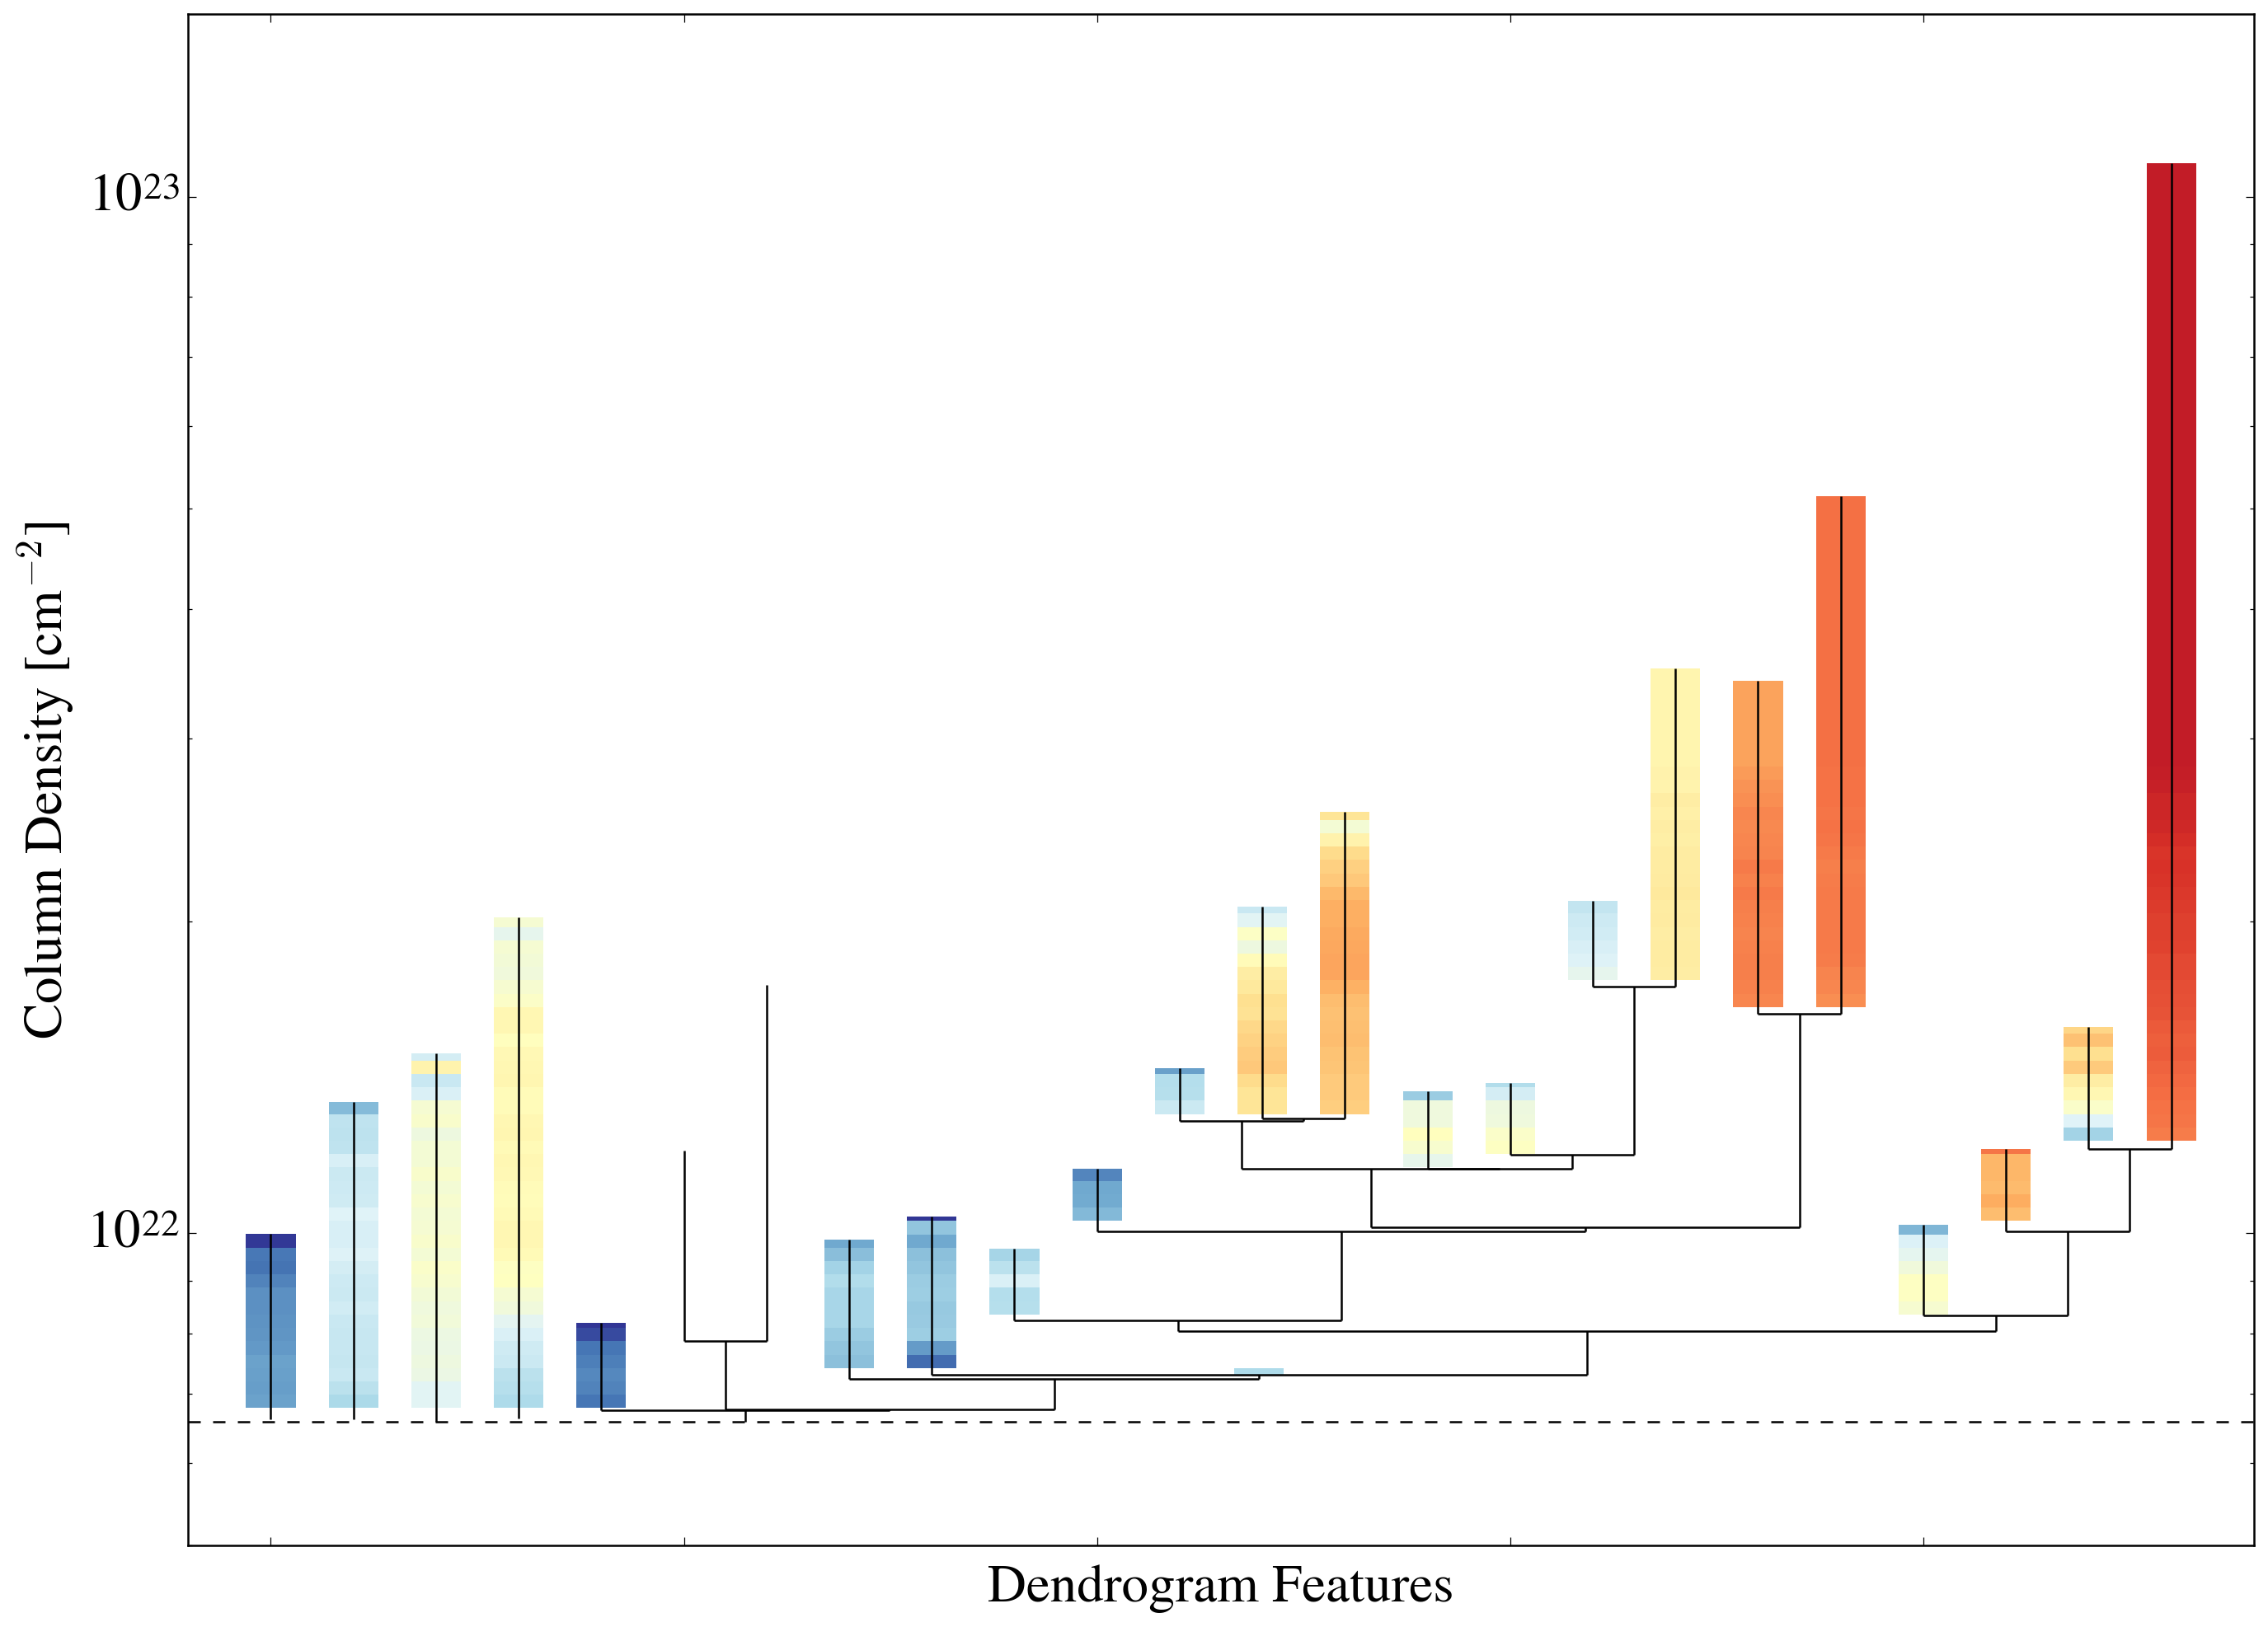

In [8]:
fig = plt.figure(figsize = (16., 12.))
ax = fig.gca()
ax.set_yscale('log')
ax.set_ylim(5e21, 1.5e23)
ax.set_xlim(-1., 24.)
ax.set_xticklabels([])
ax.set_xlabel('Dendrogram Features')
ax.set_ylabel(r'Column Density [cm$^{-2}$]')

dryadsp.plot_tree(ax,
                  'pressure',
                  cscale = 'log',
                  color = 'k')

ax.hlines(7.*9.4e20, *ax.get_xlim(),
          color = 'k',
          linestyle = '--')


/Users/hopechen/Documents/projects/git_projects/Dryads/Dryads/plot.py:42: UserWarning: Custom norm; cscale is not used.
  warnings.warn('Custom norm; cscale is not used.')


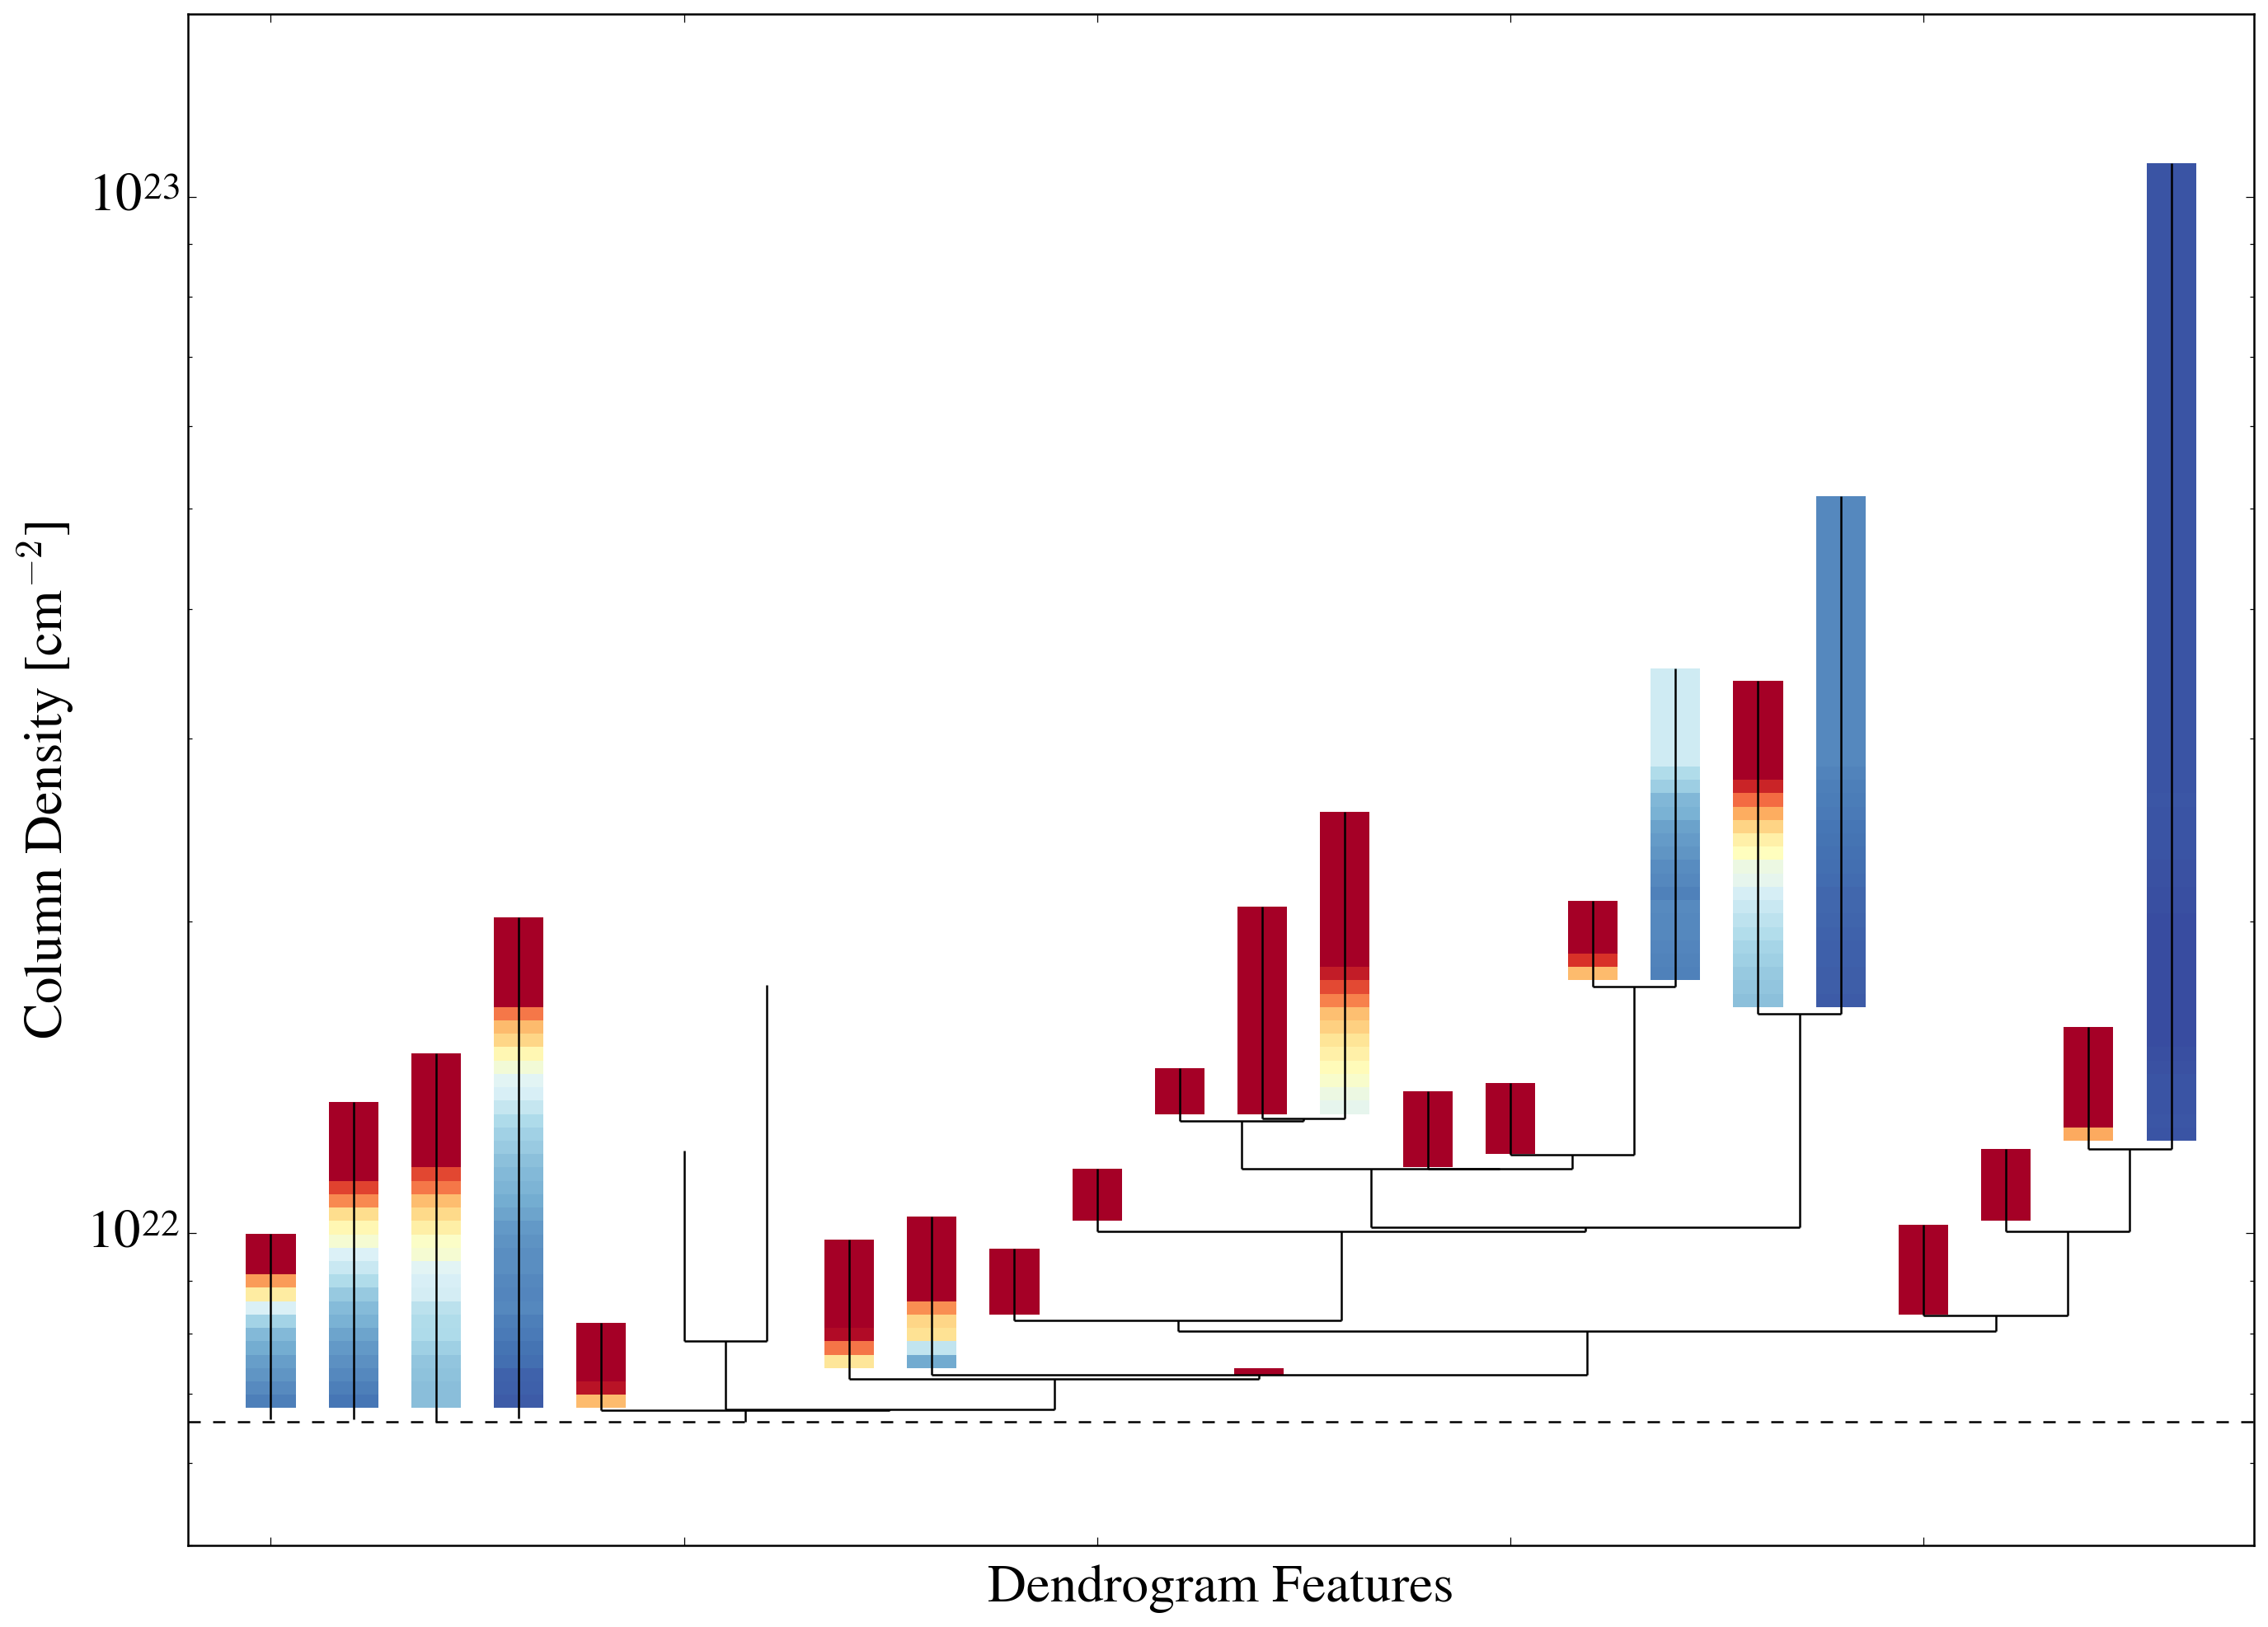

In [9]:
fig = plt.figure(figsize = (16., 12.))
ax = fig.gca()
ax.set_yscale('log')
ax.set_ylim(5e21, 1.5e23)
ax.set_xlim(-1., 24.)
ax.set_xticklabels([])
ax.set_xlabel('Dendrogram Features')
ax.set_ylabel(r'Column Density [cm$^{-2}$]')

dryadsp.plot_tree(ax,
                  'virial',
                  norm = colors.Normalize(vmin = 2., vmax = 40.),
                  color = 'k')

ax.hlines(7.*9.4e20, *ax.get_xlim(),
          color = 'k',
          linestyle = '--')



____
## Scatter Plots

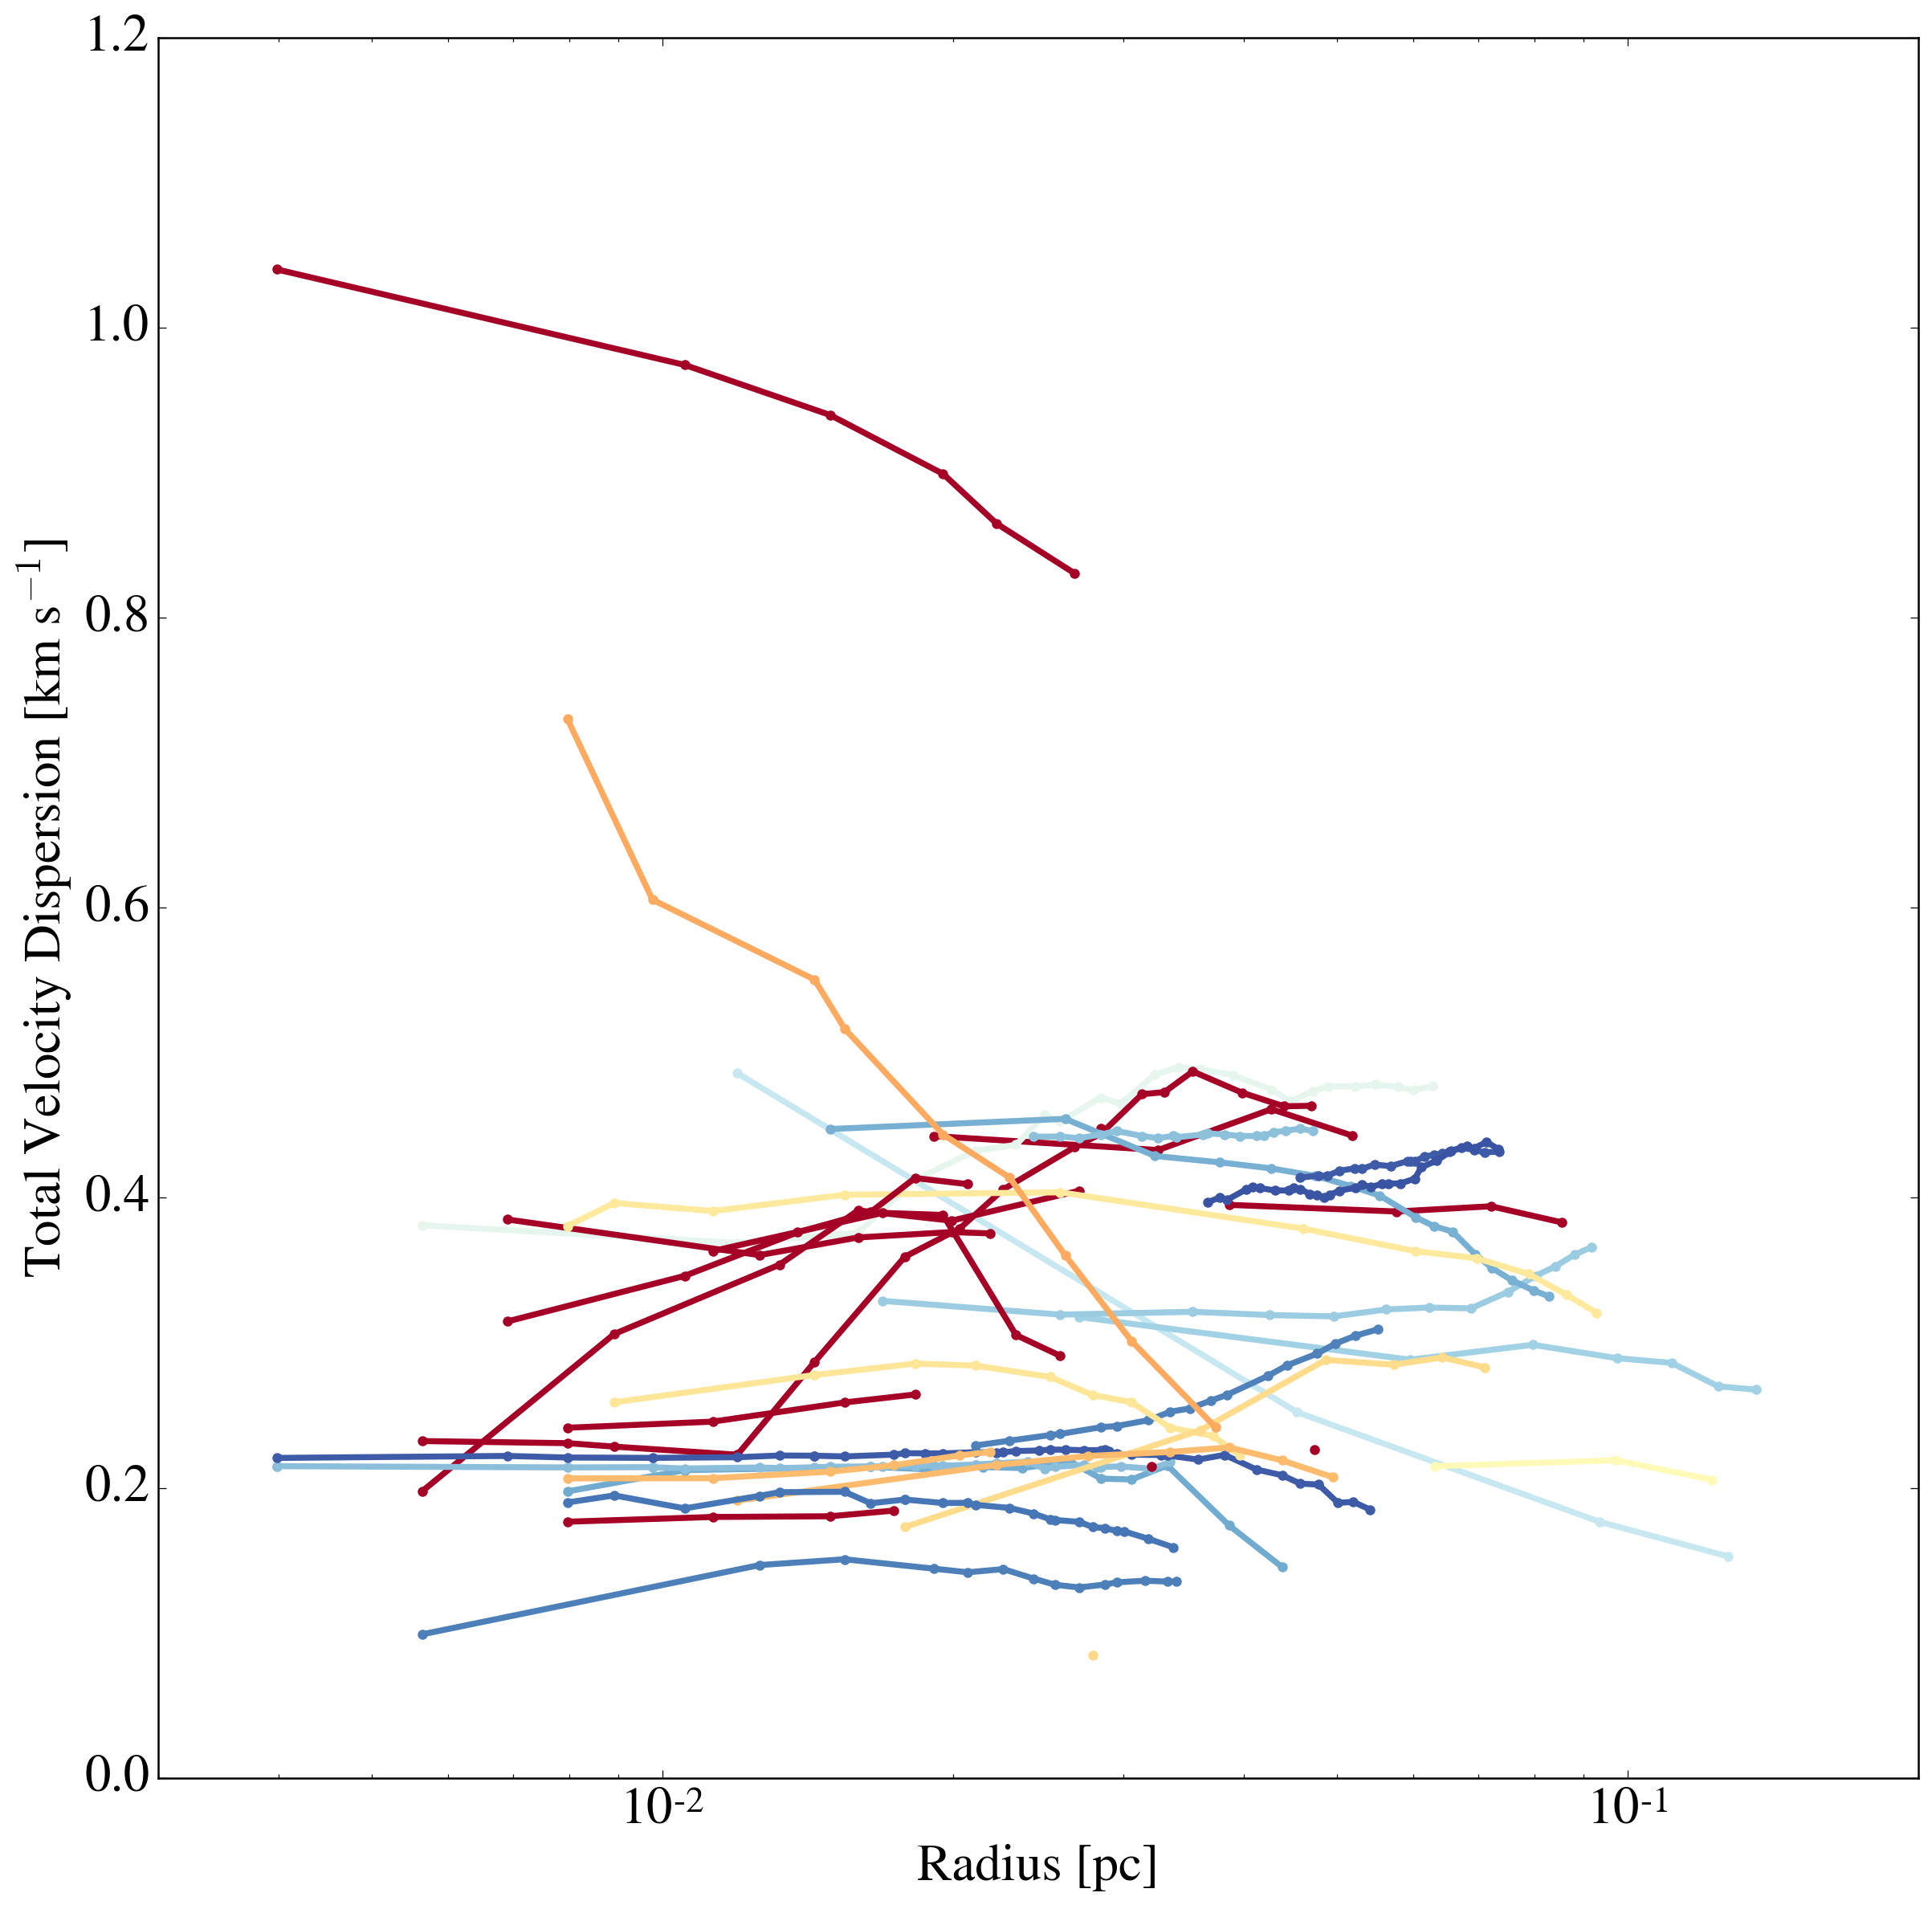

In [18]:
fig = plt.figure(figsize = (14., 14.))
ax = fig.gca()

dryadsp.plot_scatter(ax,
                     'radius',
                     'sigma',
                     norm = colors.Normalize(vmin = 2., vmax = 40.),
                     color = 'k',
                     cfeature = 'virial')

ax.set_xlim(3e-3, 2e-1)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Radius [pc]')
ax.set_ylabel(r'Total Velocity Dispersion [km s$^{-1}$]')

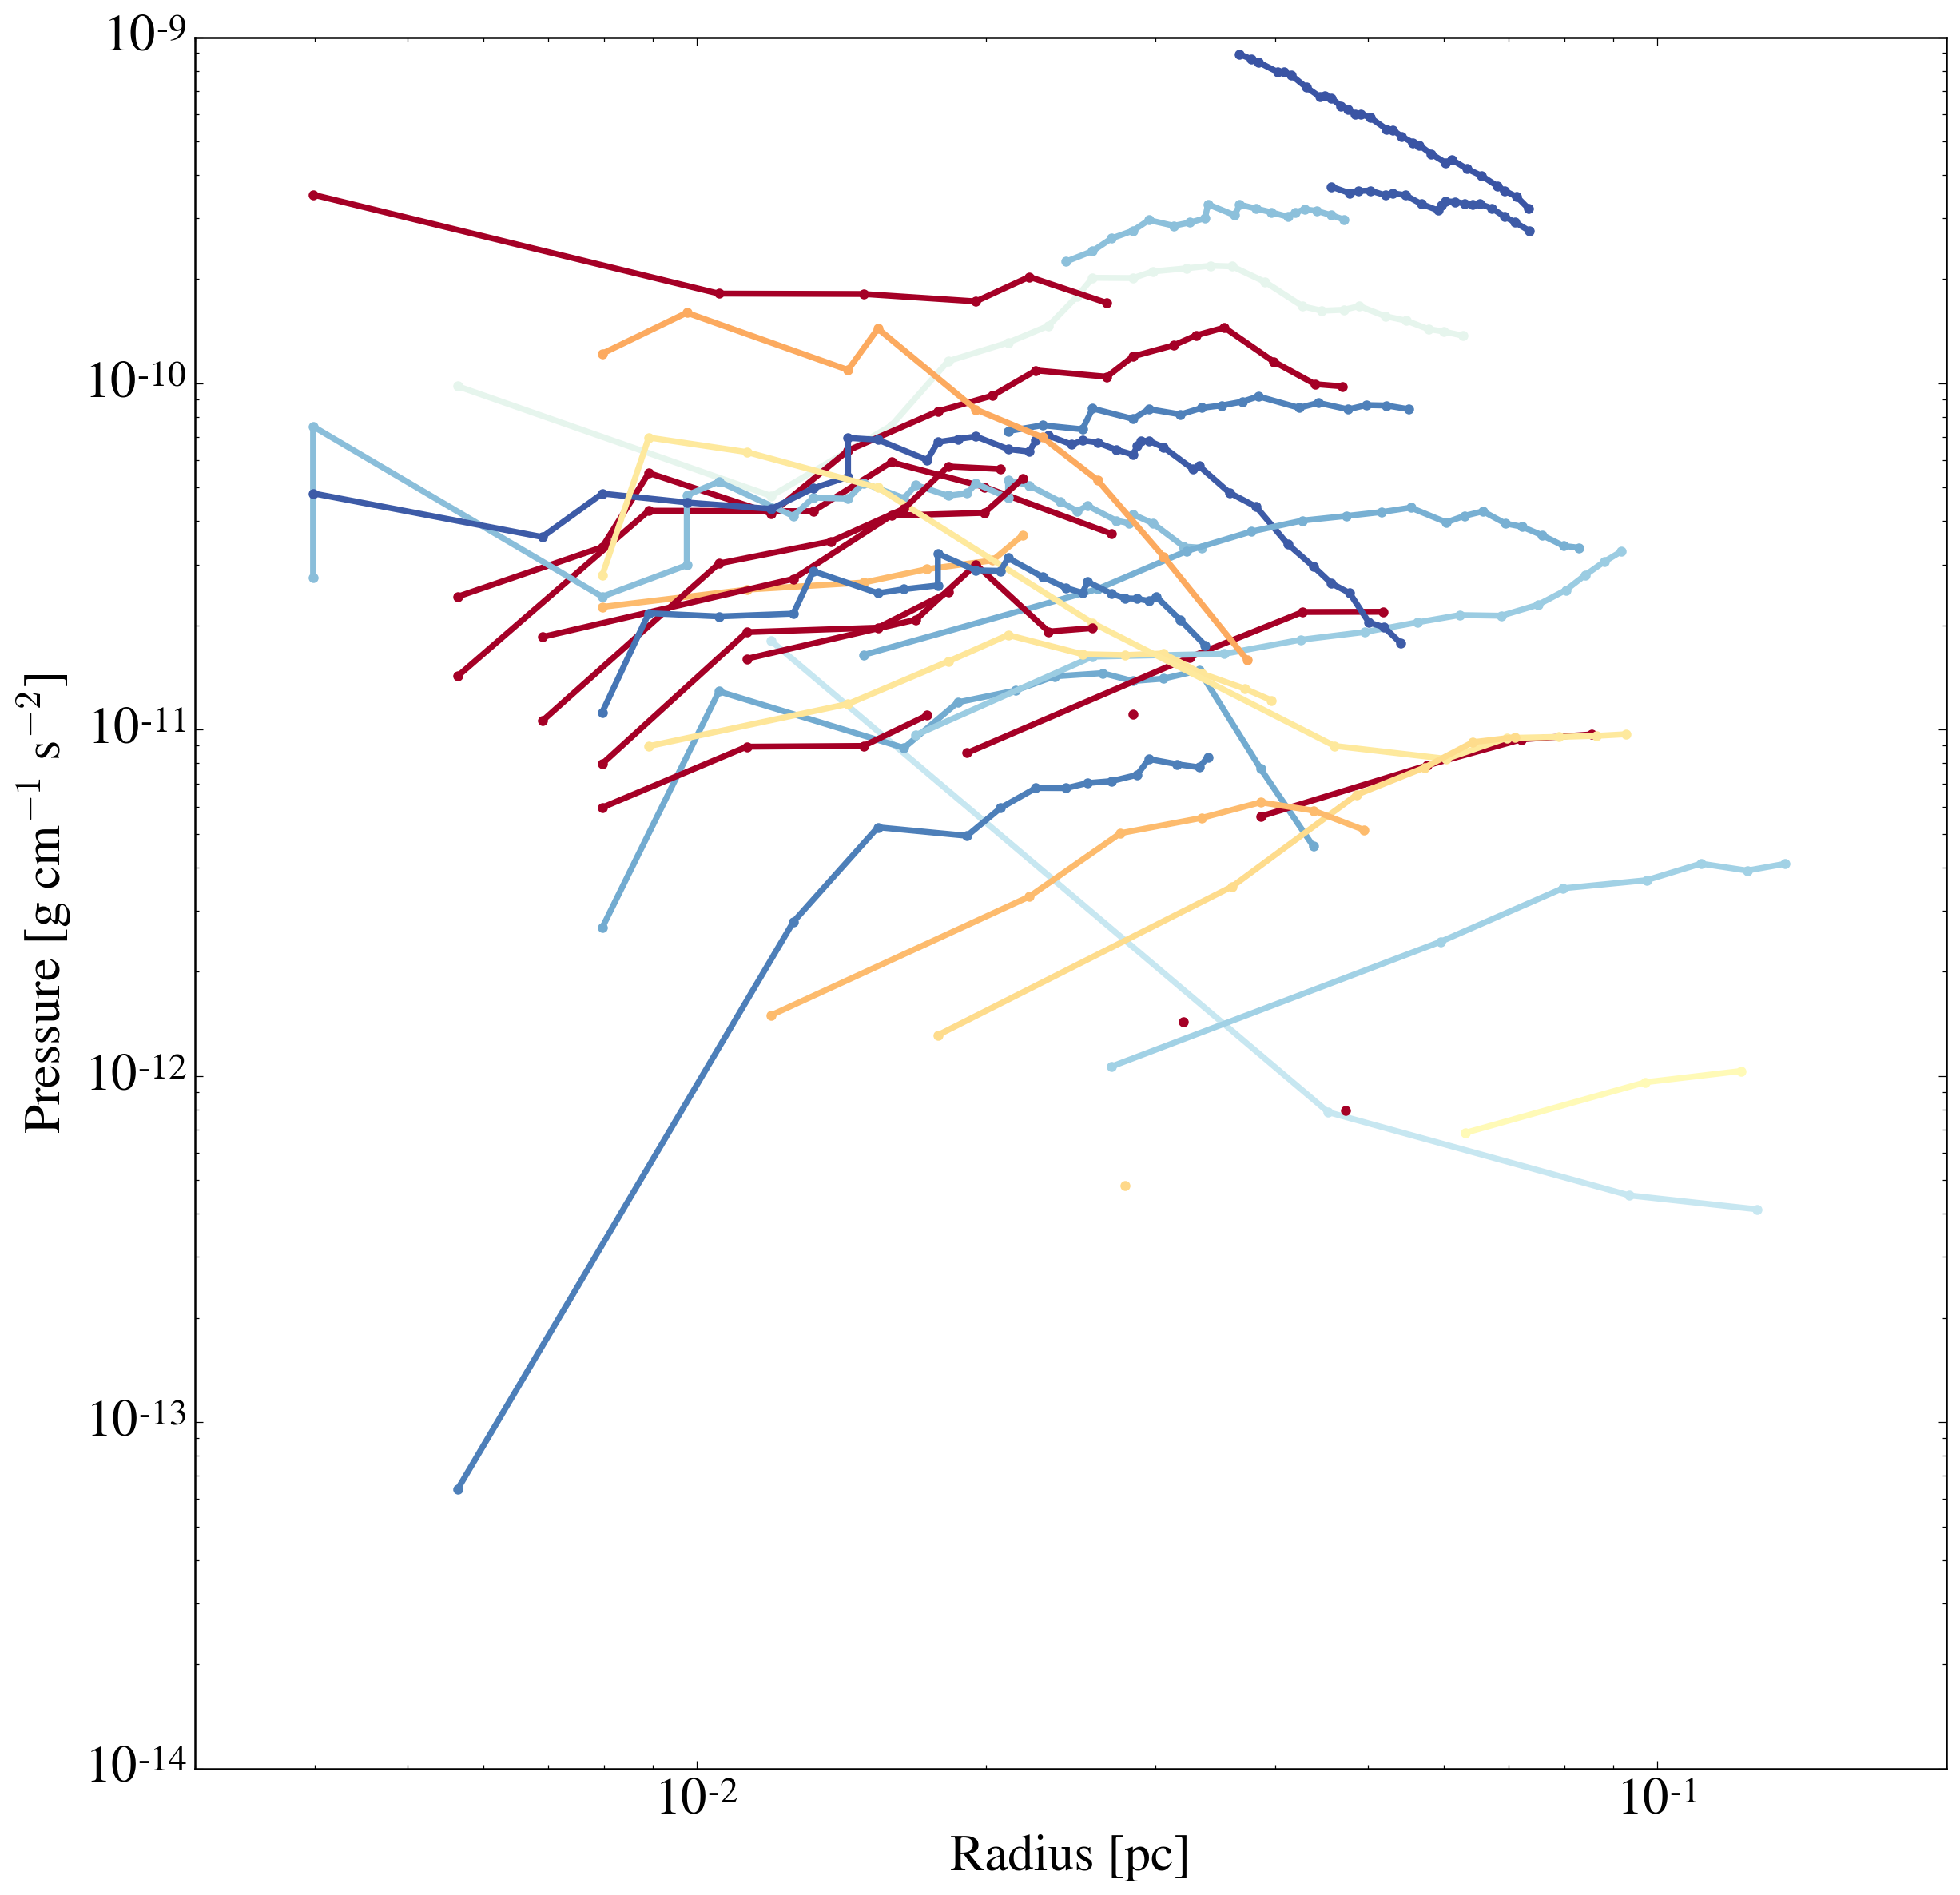

In [20]:
fig = plt.figure(figsize = (14., 14.))
ax = fig.gca()

dryadsp.plot_scatter(ax,
                     'radius',
                     'pressure',
                     norm = colors.Normalize(vmin = 2., vmax = 40.),
                     color = 'k',
                     cfeature = 'virial')

ax.set_xlim(3e-3, 2e-1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Radius [pc]')
ax.set_ylabel(r'Pressure [g cm$^{-1}$ s$^{-2}$]')